# Deep Learning | Perceptrons and MLP for Classification

### Dataset: Iris | Framework: Keras (Tensorflow)

## 🔹 1. Setup & Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
# Load dataset
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
X = iris.data
y = iris.target

In [23]:
y_cat[50]

array([0., 1., 0.])

In [11]:
feature_names = iris.feature_names
target_names = iris.target_names

In [19]:
# One-hot encode targets
y_cat = to_categorical(y)

## 🔹 2. MLP Basics: First 2 features (Iris)

### ✅ Preprocess the dataset

In [24]:
X_vis = X[:, :2]

In [30]:
X_scaled[0]

array([-0.90068117,  1.01900435])

In [28]:
# Scale inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

### ✅ Visualization: Input Space

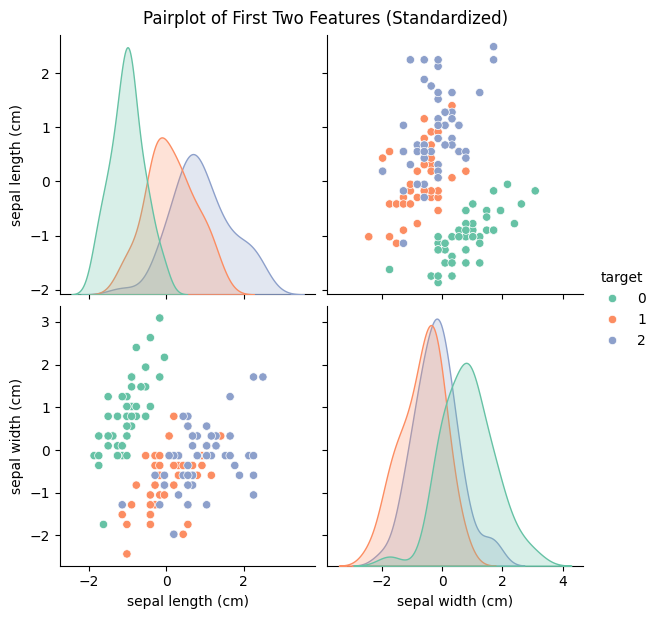

In [32]:
df_plot = pd.DataFrame(X_scaled, columns=feature_names[:2])
df_plot['target'] = y
sns.pairplot(df_plot, hue='target', palette='Set2', height=3)
plt.suptitle("Pairplot of First Two Features (Standardized)", y=1.02)
plt.show()

### ✅ Baseline Model: No Hidden Layer

In [33]:
model_linear = Sequential([
    InputLayer(shape=(2,)),
    Dense(3, activation='softmax')
])

I0000 00:00:1745595802.411088     438 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


In [34]:
model_linear.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
history_linear = model_linear.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50


I0000 00:00:1745596254.864465     717 service.cc:152] XLA service 0x7fada8005b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745596254.864494     717 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2025-04-25 08:50:54.914839: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745596255.007260     717 cuda_dnn.cc:529] Loaded cuDNN version 90501


1/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3750 - loss: 1.0889

I0000 00:00:1745596255.692485     717 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3471 - loss: 1.0889
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3658 - loss: 1.0633 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3356 - loss: 1.0705 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3221 - loss: 1.0678 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3244 - loss: 1.0579 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3683 - loss: 1.0449 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3767 - loss: 1.0408 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3269 - loss: 1.0963 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3938 - loss: 1.0072 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3885 - loss: 1.0175 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3667 - loss: 1.0196 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3688 - loss: 0.9971 
Epoch 13/50

In [47]:
# Evaluation
y_pred_linear = np.argmax(model_linear.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [48]:
print("Accuracy (No Hidden Layer):", accuracy_score(y_true, y_pred_linear))

Accuracy (No Hidden Layer): 0.5666666666666667


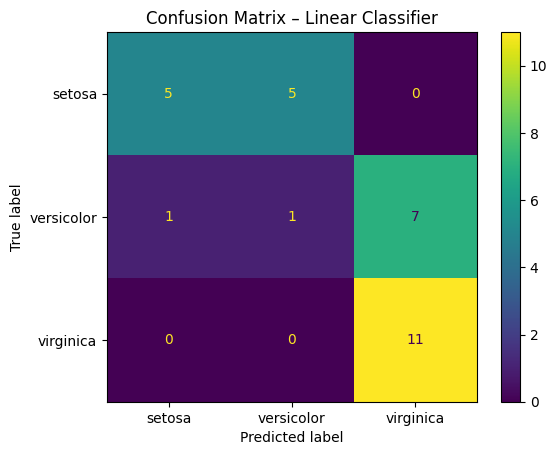

In [49]:
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred_linear), display_labels=target_names).plot()
plt.title("Confusion Matrix – Linear Classifier")
plt.show()

### ✅ MLP with Hidden Layer

In [50]:
model_mlp = Sequential([
    InputLayer(shape=(2,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
history_mlp = model_mlp.fit(X_train, y_train, epochs=50, verbose=0)

In [52]:
y_pred_mlp = np.argmax(model_mlp.predict(X_test), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [53]:
print("Accuracy (With Hidden Layer):", accuracy_score(y_true, y_pred_mlp))

Accuracy (With Hidden Layer): 0.8666666666666667


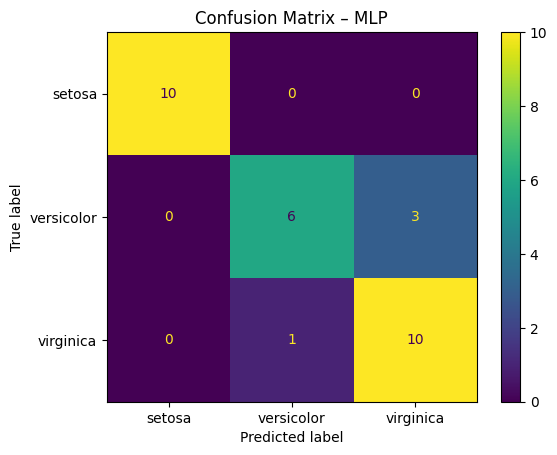

In [54]:
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred_mlp), display_labels=target_names).plot()
plt.title("Confusion Matrix – MLP")
plt.show()

## 🔹 3. Visualizing Decision Boundaries

In [55]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    preds = np.argmax(probs, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.4, cmap='Pastel2')
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', cmap='Dark2')
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

3759/3759 ━━━━━━━━━━━━━━━━━━━━ 4s 921us/step


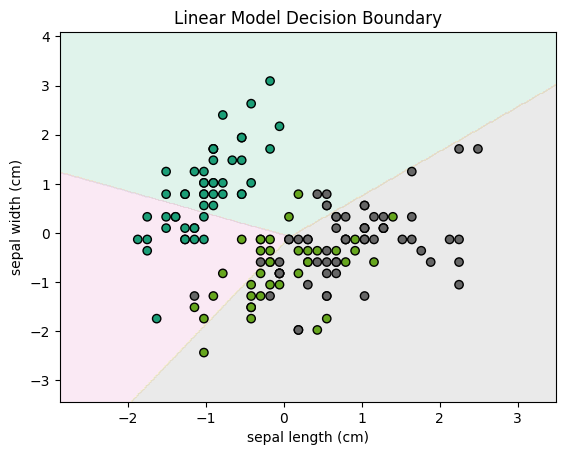

In [56]:
# Decision boundaries
plot_decision_boundary(model_linear, X_scaled, y_cat, "Linear Model Decision Boundary")

3759/3759 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


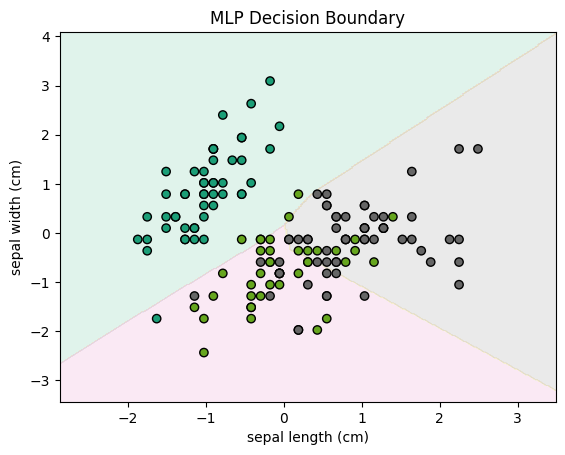

In [57]:
plot_decision_boundary(model_mlp, X_scaled, y_cat, "MLP Decision Boundary")

## 🔹 3. MLP Using All 4 Features of Iris Dataset

### ✅ Prepare Full Feature Input

In [58]:
# Reload original features (all 4)
X_full = iris.data

# Standardize all 4 features
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Split again
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full_scaled, y_cat, test_size=0.2, random_state=42)

### ✅ Define and Train MLP

In [59]:
model_full = Sequential([
    InputLayer(shape=(4,)),
    Dense(10, activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model_full.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_full.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
history_full = model_full.fit(X_train_f, y_train_f, epochs=300, verbose=0)

### ✅ Evaluate and Visualize

In [61]:
# Predict
y_pred_full = np.argmax(model_full.predict(X_test_f), axis=1)
y_true_full = np.argmax(y_test_f, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


In [62]:
# Accuracy and confusion matrix
print("Accuracy (All Features MLP):", accuracy_score(y_true_full, y_pred_full))

Accuracy (All Features MLP): 1.0


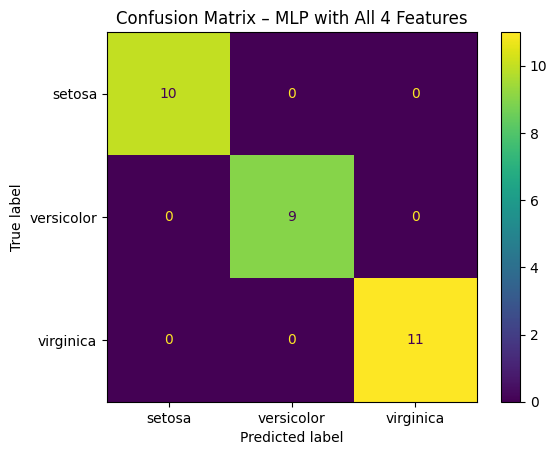

In [63]:
ConfusionMatrixDisplay(confusion_matrix(y_true_full, y_pred_full), display_labels=target_names).plot()
plt.title("Confusion Matrix – MLP with All 4 Features")
plt.show()

### ✅ Plot Learning Curves

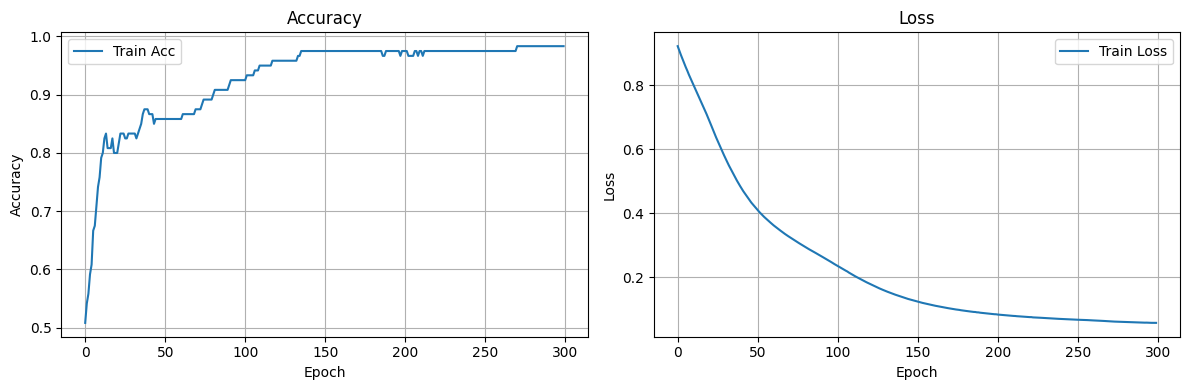

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_full.history['accuracy'], label='Train Acc')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_full.history['loss'], label='Train Loss')
axs[1].set_title('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 🔹 4. Update Model Training (with Validation Data)

In [65]:
model_full_2 = Sequential([
    InputLayer(shape=(4,)),
    Dense(10, activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model_full_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_full_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train with validation split
history_full_2 = model_full_2.fit(
    X_train_f, y_train_f,
    validation_split=0.2,
    epochs=300,
    verbose=1
)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.2005 - loss: 1.1424 - val_accuracy: 0.2917 - val_loss: 1.1278
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2070 - loss: 1.1274 - val_accuracy: 0.3333 - val_loss: 1.1089
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2057 - loss: 1.1075 - val_accuracy: 0.3333 - val_loss: 1.0909
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2370 - loss: 1.0941 - val_accuracy: 0.5000 - val_loss: 1.0738
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2474 - loss: 1.0808 - val_accuracy: 0.4583 - val_loss: 1.0575
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3164 - loss: 1.0671 - val_accuracy: 0.4583 - val_loss: 1.0421
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3099 - loss: 1.0574 - val_accuracy: 0.5833 - val_loss: 1.0273
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3763 - loss: 1.0457 - val_accuracy: 0.7500 - val_loss

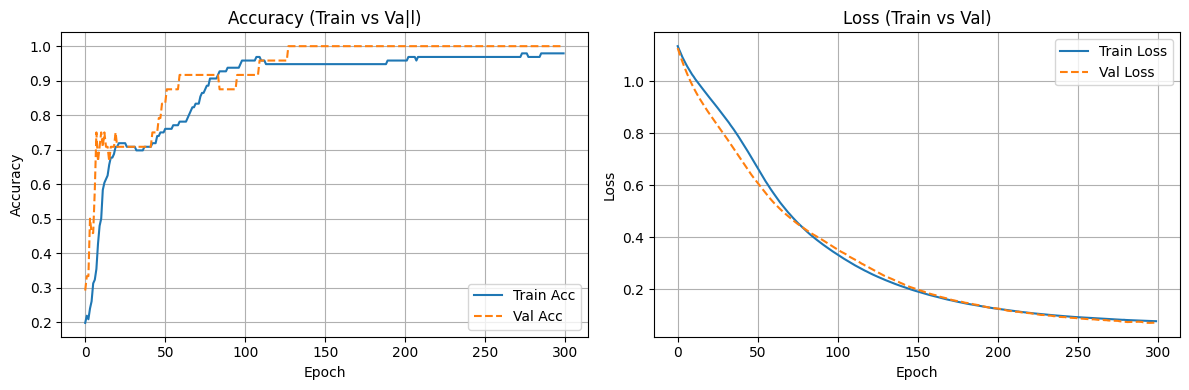

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_full_2.history['accuracy'], label='Train Acc')
axs[0].plot(history_full_2.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Va|l)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_full_2.history['loss'], label='Train Loss')
axs[1].plot(history_full_2.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Accuracy (All Features MLP): 1.0


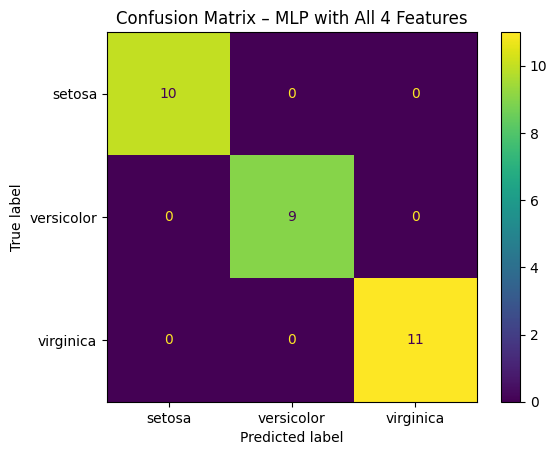

In [68]:
# Predict
y_pred_full_2 = np.argmax(model_full_2.predict(X_test_f), axis=1)

# Accuracy and confusion matrix
print("Accuracy (All Features MLP):", accuracy_score(y_true_full, y_pred_full_2))

ConfusionMatrixDisplay(confusion_matrix(y_true_full, y_pred_full_2), display_labels=target_names).plot()
plt.title("Confusion Matrix – MLP with All 4 Features")
plt.show()

## 🔹 5. Early Stopping and Model Checkpointing

In [ ]:
model_full_3 = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model_full_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_full_3.summary()

### ✅ Set Up Callbacks

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,  # Recover best weights, not just stop
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model_iris.keras',  # File name (SavedModel format)
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


### ✅ Train with Callbacks

In [ ]:
history_full_3 = model_full_3.fit(
    X_train_f, y_train_f,
    validation_split=0.2,
    epochs=200,
    callbacks=[early_stop, checkpoint],
    verbose=2
)

### ✅ Evaluate and Visualize

In [ ]:
# Predict
y_pred_full_3 = np.argmax(model_full_3.predict(X_test_f), axis=1)

# Accuracy and confusion matrix
print("Accuracy (All Features MLP):", accuracy_score(y_true_full, y_pred_full_3))

ConfusionMatrixDisplay(confusion_matrix(y_true_full, y_pred_full_3), display_labels=target_names).plot()
plt.title("Confusion Matrix – MLP with All 4 Features")
plt.show()

### ✅ Load Best Model and Evaluate

In [ ]:
best_model = load_model('best_model_iris.keras')

y_pred_best = np.argmax(best_model.predict(X_test_f), axis=1)
print("Accuracy of Best Saved Model:", accuracy_score(y_true_full, y_pred_best))
ConfusionMatrixDisplay(confusion_matrix(y_true_full, y_pred_best), display_labels=target_names).plot()
plt.title("Confusion Matrix – Best Saved Model")
plt.show()
